In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500);
sns.set_palette('pastel');

----
Helper Function

In [2]:
# Summarize Numeric Feature
def numeric_summarize(data, x):
    # Get Stats Informations
    mx = data[x].max()
    mn = data[x].min()
    avg = data[x].mean()
    
    print(f"Max = {mx}\nMin = {mn}\nMean = {avg}")
    
    # Plot
    plt.figure(figsize = (15, 5))
    # Box Plot 
    plt.subplot(1, 2, 1)
    sns.boxplot(x = data[x])
    # Dist plot
    plt.subplot(1, 2, 2)
    sns.histplot(x = data[x], kde = True, color = 'red', bins = 10)
    

In [3]:
def remove_outlires(data, col_name):
    assert col_name in data.columns, "Column Didn't found in given data"
    q3 = data[col_name].quantile(0.75)
    q1 = data[col_name].quantile(0.25)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr
    print(f'Upper Fence = {upper_fence} , Lower Fence = {lower_fence}')
    data.drop(data[ (data[col_name] > upper_fence) | (data[col_name] < lower_fence) ].index, inplace = True)

-----

In [4]:
data = pd.read_csv('supermarket.csv')

In [5]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# Some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

* There is no null in dataset and we have 9 Objects and 8 Numeric values

In [7]:
# Stats info about dataset
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [8]:
# Convert Date feature to pandas date
data['Date'] = pd.to_datetime(data['Date']) 

In [9]:
data['Time'] = pd.to_datetime(data['Time']) 

---
# EDA

## Total Features

In [10]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-08-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-08-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-08-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-08-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-08-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


Max = 1042.65
Min = 10.6785
Mean = 322.96674900000005


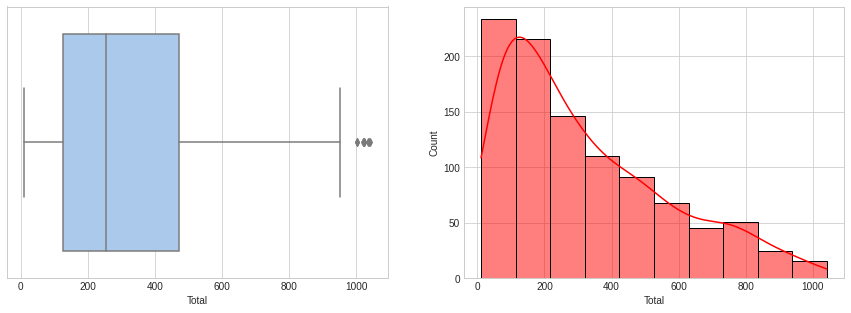

In [11]:
numeric_summarize(data = data, x = 'Total')

In [12]:
remove_outlires(data = data, col_name = 'Total')

Upper Fence = 991.7420625 , Lower Fence = -395.9694375


-----

##

In [13]:
# What is the max Branch count per city ?
data['Branch'].nunique()

3

* The max Number of branches in city is 3 [A, B, C]

In [14]:
# How many city did we have ?
print(data['City'].unique())

['Yangon' 'Naypyitaw' 'Mandalay']


In [15]:
# Each Branch in Each city and number of entries
data[ ['City', 'Branch'] ].value_counts().to_frame()

,,0
City,Branch,
Yangon,A,339
Mandalay,B,330
Naypyitaw,C,322


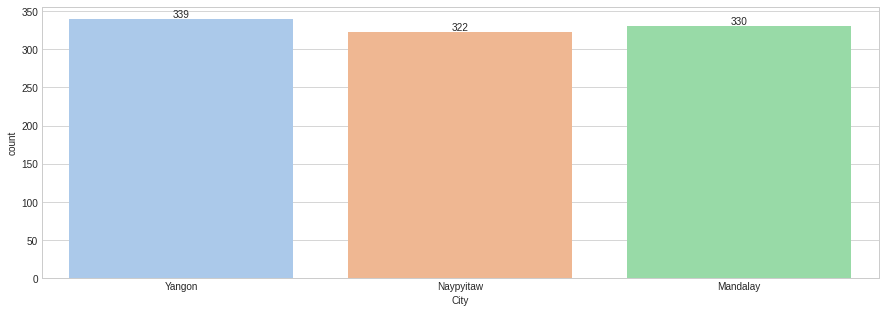

In [16]:
# Plot the freq of each city
plt.figure(figsize = (15, 5))
ax = sns.countplot(x = data['City']);
for i in ax.containers:
    ax.bar_label(i)

* Yangon, Mandalat and Naypyitaw has only one branch
* `Yangon` has the max Number of entries
* `Naypyitaw` has the min Number of entries

In [17]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-08-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-08-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-08-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-08-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-08-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


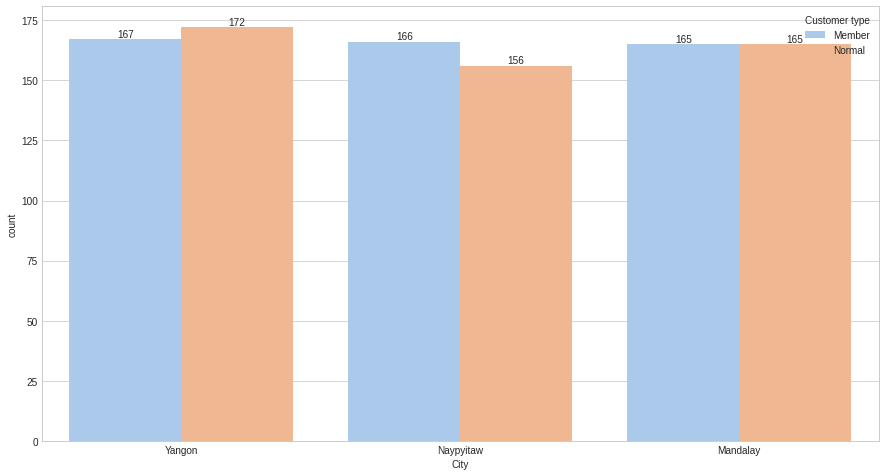

In [18]:
# Number of Member and Normal in each city ?
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = data['City'], hue = data['Customer type'])
for i in ax.containers:
    ax.bar_label(i)

* in Yangon, Mandalay Normal greater than Member
* Naypyitaw Member is greater than Normal

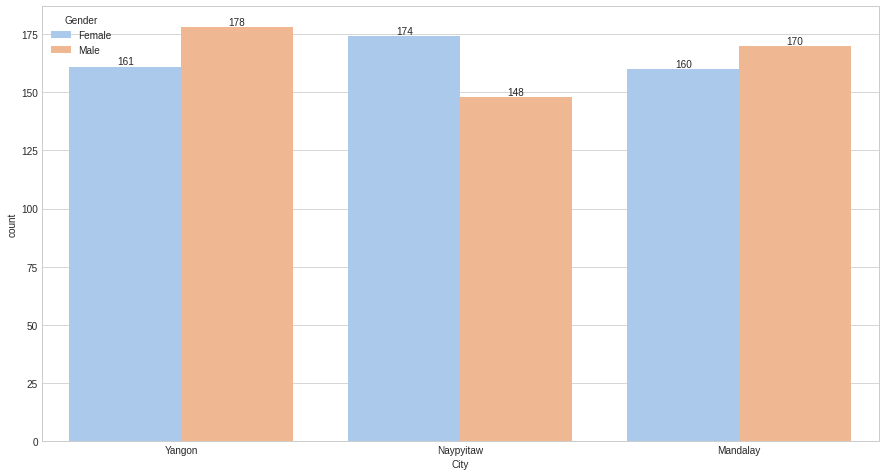

In [19]:
# Number of Males and Females in each city ?
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = data['City'], hue = data['Gender'])
for i in ax.containers:
    ax.bar_label(i)

* Yangon and Mandalay Number of males is greater than Number of Females 
* Naypyitaw Number of Females is greater than Number of males

In [20]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-08-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-08-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-08-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-08-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-08-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


<AxesSubplot:xlabel='Date', ylabel='City'>

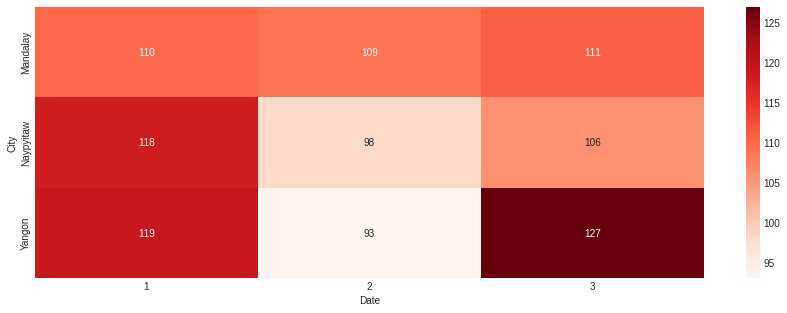

In [21]:
# Number of Sales for each City in Each Month
plt.figure(figsize = (15, 5))
df = data.groupby([data['Date'].dt.month, 'City']).count()['Branch'].reset_index()
df = df.pivot_table(index = 'City', columns = 'Date', values = 'Branch')
sns.heatmap(df, annot = True, fmt = 'd', cmap = 'Reds')

* Second month is the least Month we sale over three city
    * Recomendation : we can do sales in this month


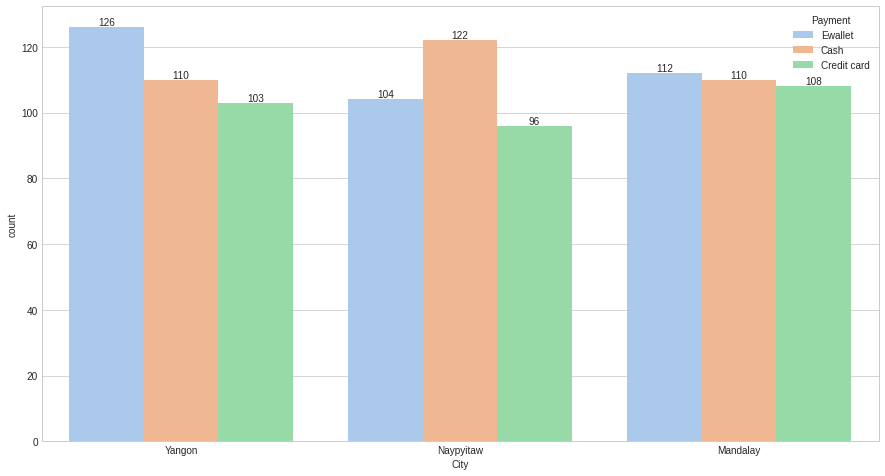

In [22]:
# How people prefare to pay in each city ??
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = data['City'], hue = data['Payment'])
for i in ax.containers:
    ax.bar_label(i)

* In each city Number of poeple who payed with credit card is the min
* In Yangon People who pay using Ewallet is the max
* Naypyitaw People prefer to pay using Cash

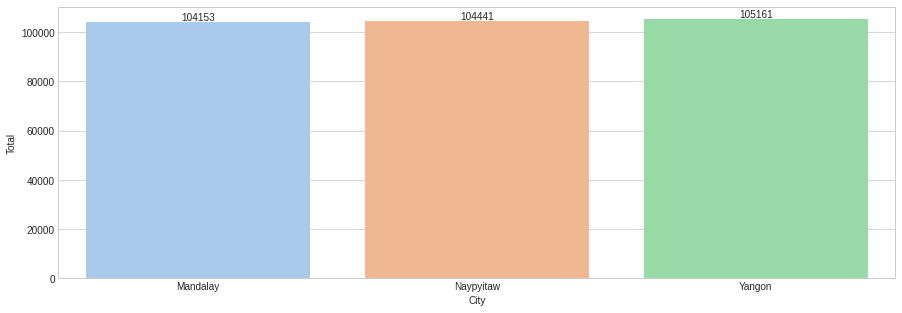

In [23]:
# Wich City have the max total ?
plt.figure(figsize = (15, 5))
df = data.groupby(data['City']).sum()['Total'].reset_index()
ax = sns.barplot(x = df['City'], y = df['Total'], estimator = np.sum)
for i in ax.containers:
    ax.bar_label(i)


* Three city make almost the same total but Yangon in greater one

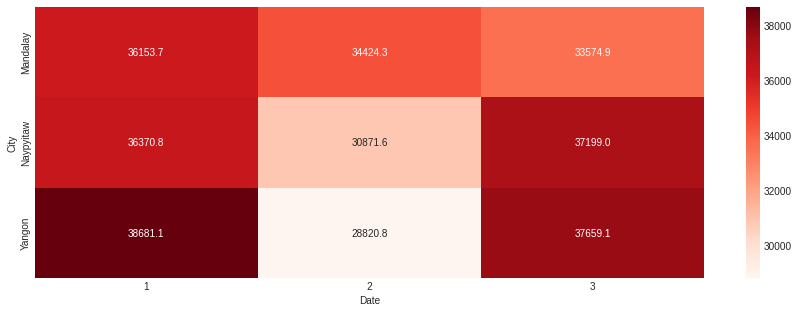

In [24]:
# Number of Sales for each City in Each Month
plt.figure(figsize = (15, 5))
df = data.groupby([data['Date'].dt.month, 'City']).sum()['Total'].reset_index()
df = df.pivot_table(index = 'City', columns = 'Date', values = 'Total')
fig = sns.heatmap(df, annot = True, fmt = "0.1f",cmap = 'Reds');

* Yangon, Naypyitaw Make the least Total in Second Month
* Mandalay Make the least Total in Third Month

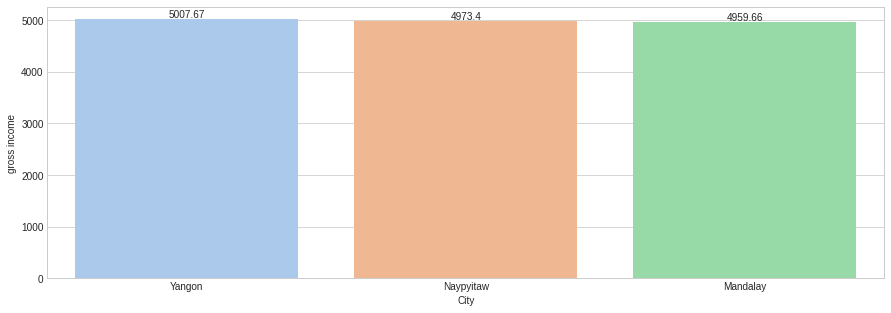

In [25]:
# Which City make the best gross income
plt.figure(figsize = (15, 5))
ax = sns.barplot(x = data['City'], y = data['gross income'], estimator = np.sum, ci = None)
for i in ax.containers:
    ax.bar_label(i)

* All city almost make the same gross income

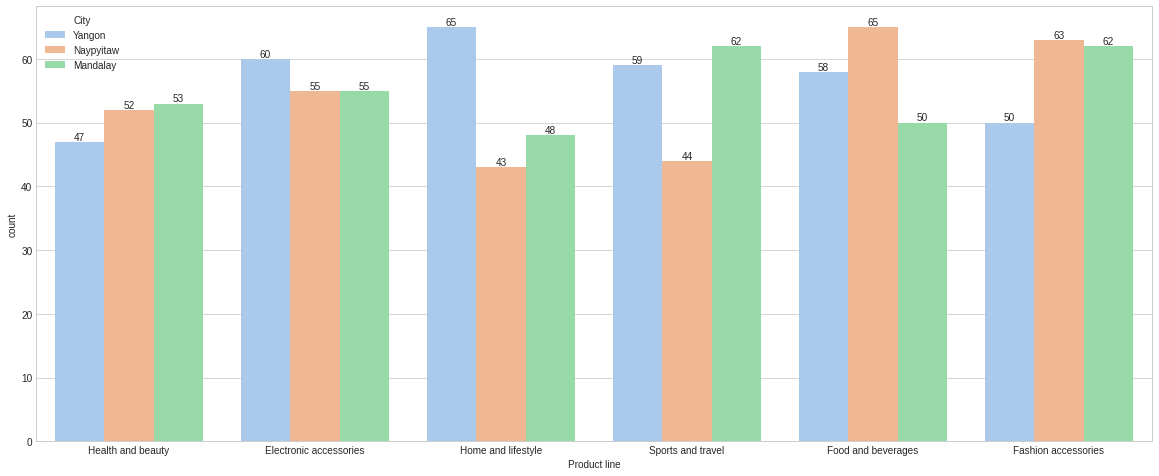

In [26]:
# Which line is most selling in each city ?
plt.figure(figsize = (20, 8))
ax = sns.countplot(x = data['Product line'], hue = data['City'])
for i in ax.containers:
    ax.bar_label(i)

* Electronic and Home & Life style is the max in `Yangon`
* Food & beverages and Fashion accessories if the max in `Naypyitaw`
* Health & beauty and Sports & Travel is the max in `Mandalay`

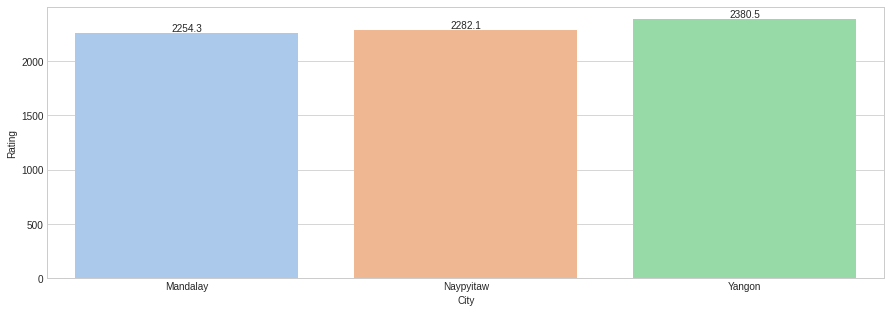

In [27]:
# Wich City get high rate ?
plt.figure(figsize = (15, 5))
df = data['Rating'].groupby(data['City']).sum().reset_index()
ax = sns.barplot(x = df['City'], y = df['Rating']);
for i in ax.containers:
    ax.bar_label(i)

* Yangon has the High Rate 
* Mandalay has the Low Rate

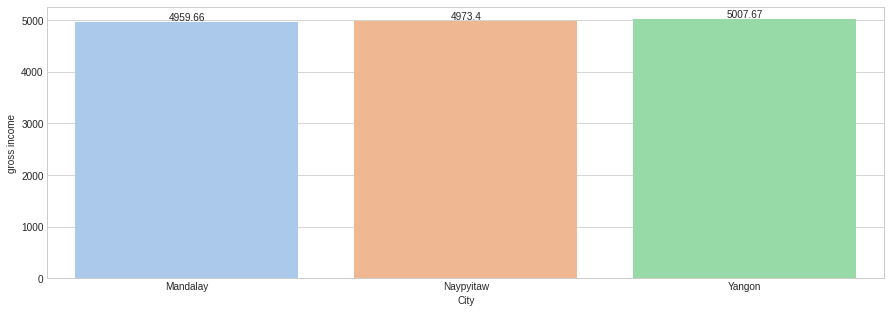

In [28]:
# Which City was making the high Gross income ?
plt.figure(figsize = (15, 5))
df = data['gross income'].groupby(data['City']).sum().reset_index() 
ax = sns.barplot(x = df['City'], y = df['gross income'])
for i in ax.containers:
    ax.bar_label(i)

* Three Cities almost the same but Yangon is the max by making `5007.67`

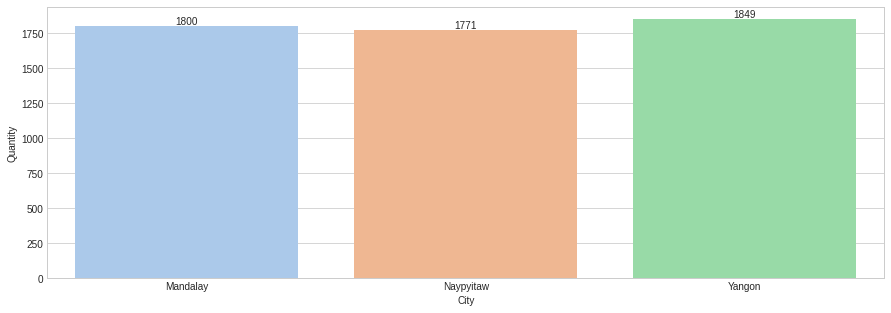

In [29]:
# Wich the max city to sell quantites ?
plt.figure(figsize = (15, 5))
df = data["Quantity"].groupby(data['City']).sum().reset_index()
ax =sns.barplot(x = df['City'], y = df['Quantity']);
for i in ax.containers:
    ax.bar_label(i)

* `Yangon` make the max quatities pay

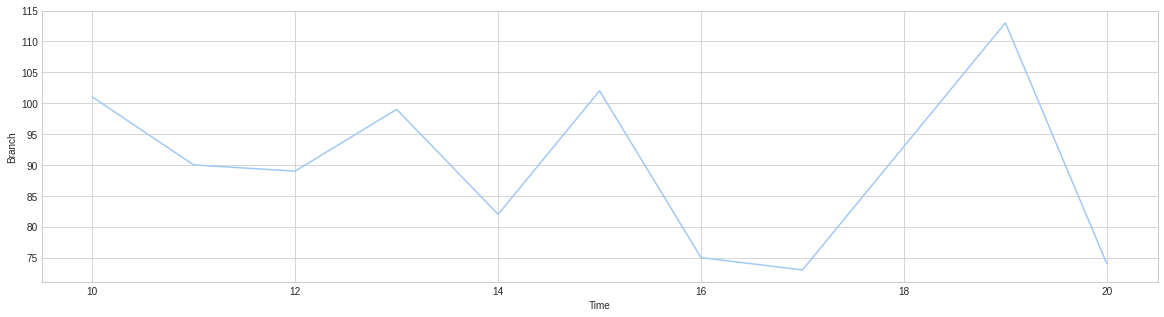

In [30]:
# When we hit the max pay and when we hit the min ?
plt.figure(figsize = (20, 5))
df = data.groupby([data['Time'].dt.hour]).count()['Branch'].reset_index()
sns.lineplot(x = df['Time'], y = df['Branch']);

* Between 18-20 We hit the max number of selling 
* Between 16-18 we hit the min number of selling

In [31]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-08-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-08-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-08-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-08-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-08-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


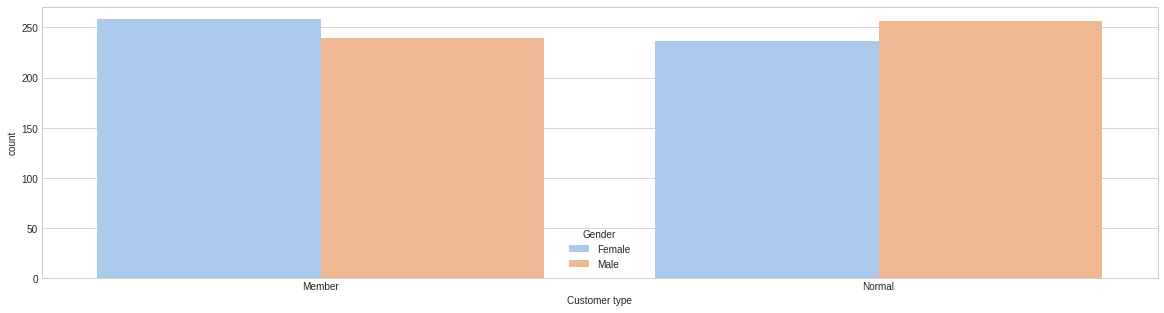

In [32]:
# Customer Type Males or females 
plt.figure(figsize = (20, 5))
sns.countplot(x = data['Customer type'], hue = data['Gender']);

* Number of Female Member is greater than Number of Males
* Number of Males in Normal is greater than Female

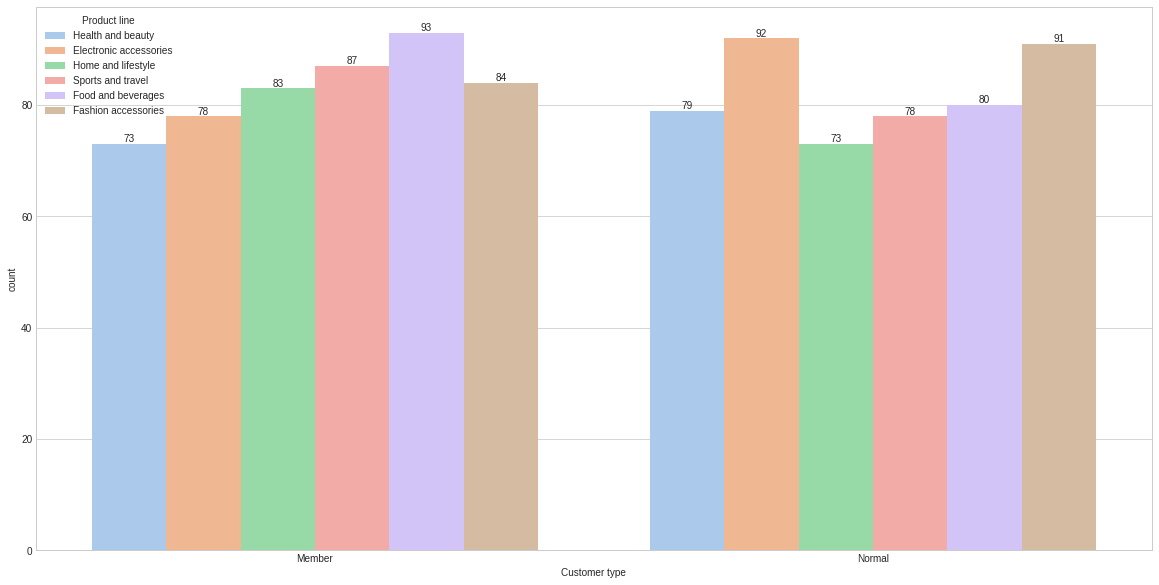

In [33]:
# Every Product line are intersting by Member or Normal ?
plt.figure(figsize = (20, 10))
ax = sns.countplot(x = data['Customer type'], hue = data['Product line'])
for i in ax.containers:
    ax.bar_label(i)

* Members are interesting in Food and beverages
* Normal are interesting in Electronic accessories and Fashion accessories

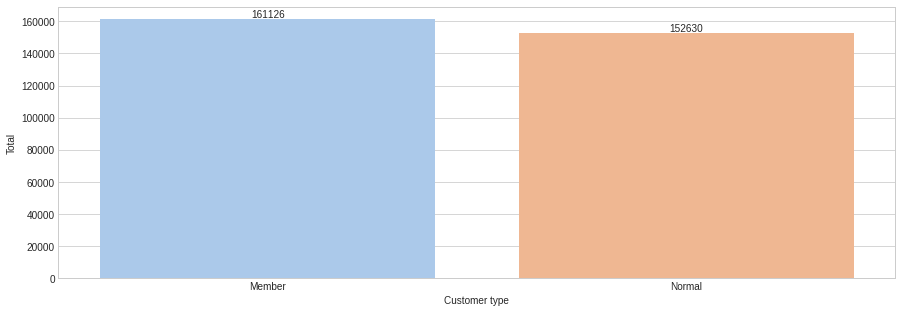

In [34]:
# Who pay the max Members or Normals ?
plt.figure(figsize = (15, 5))
df = data['Total'].groupby(data['Customer type']).sum().reset_index()
ax = sns.barplot(x = df['Customer type'], y = df['Total'])
for i in ax.containers:
    ax.bar_label(i)

* Members pay larger than Normals

In [35]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-08-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-08-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-08-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-08-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-08-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


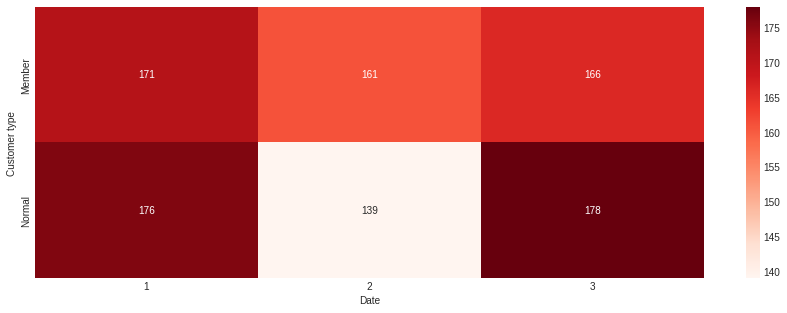

In [36]:
# Count of Members and Normal in each Month
plt.figure(figsize = (15, 5))
df = data.groupby(['Customer type', data.Date.dt.month]).count()['Branch'].reset_index()
df = df.pivot_table(columns = 'Date', index = 'Customer type', values = 'Branch') 
sns.heatmap(df, cmap = "Reds", annot = True, fmt = 'd');

* Most of our Customers are from Normals and they hit the max in 1 and 3 but in month 2 they hit the min  

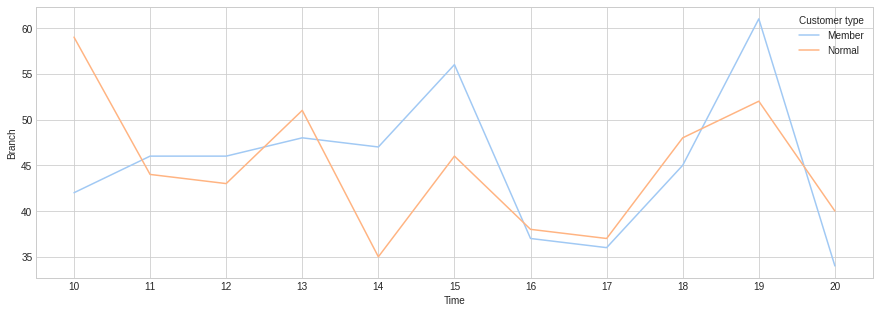

In [37]:
# Product sell per hour based on type
plt.figure(figsize = (15, 5))
df = data.groupby(['Customer type', data.Time.dt.hour]).count()['Branch'].reset_index() 
#sns.heatmap(df, cmap = "Reds", annot = True, fmt = 'd');
sns.lineplot(x = df['Time'], y = df['Branch'], hue = df['Customer type']);
plt.xticks(range(10, 21));

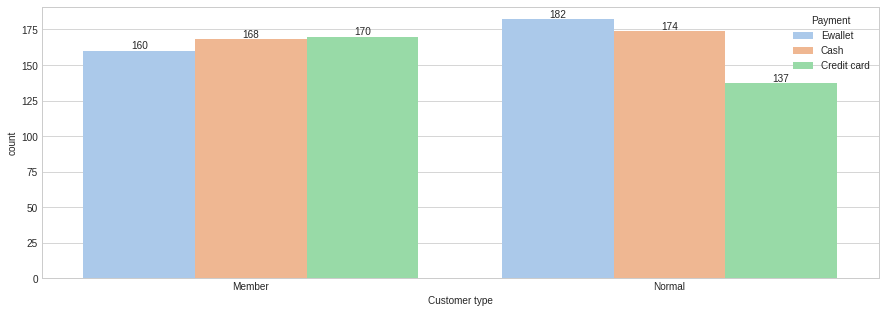

In [38]:
# Type of Payment for each Cutomer 
plt.figure(figsize = (15, 5))
ax = sns.countplot(x = data['Customer type'], hue = data['Payment'])
for i in ax.containers:
    ax.bar_label(i)

* Members seem to be equally distributed in Member type and Members prefer to pay using Credit Card
* Normals Prefer to Pay using Ewallet and Most of them don't prefer to pay using Credit card

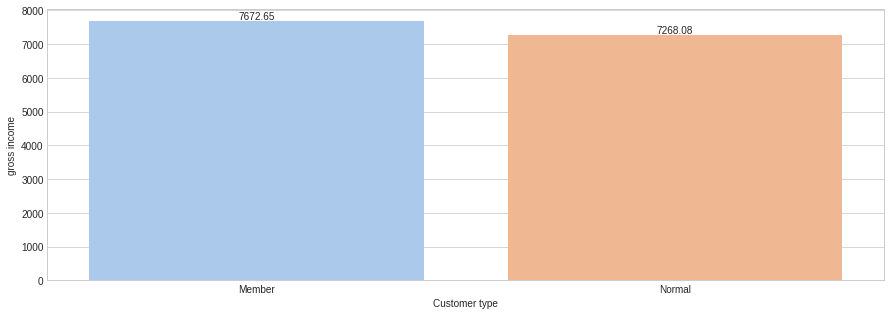

In [39]:
# From Whom we make the max gross income ?
plt.figure(figsize = (15, 5))
df = data['gross income'].groupby(data['Customer type']).sum().reset_index()
ax = sns.barplot(x = df['Customer type'], y = df['gross income'])
for i in ax.containers:
    ax.bar_label(i)

* From Member we make the max Gross income 

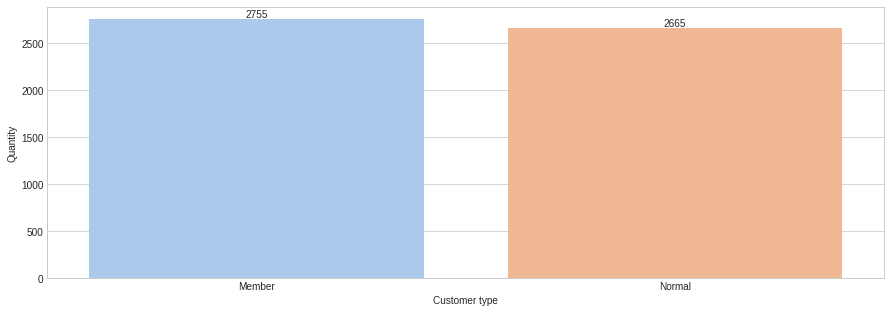

In [40]:
# Who the max to by quantites Members or Normals ?
plt.figure(figsize = (15, 5))
df = data['Quantity'].groupby(data['Customer type']).sum().reset_index()
ax = sns.barplot(x = df['Customer type'], y = df['Quantity'])
for i in ax.containers:
    ax.bar_label(i)

* the Max Quantity is buy by Members

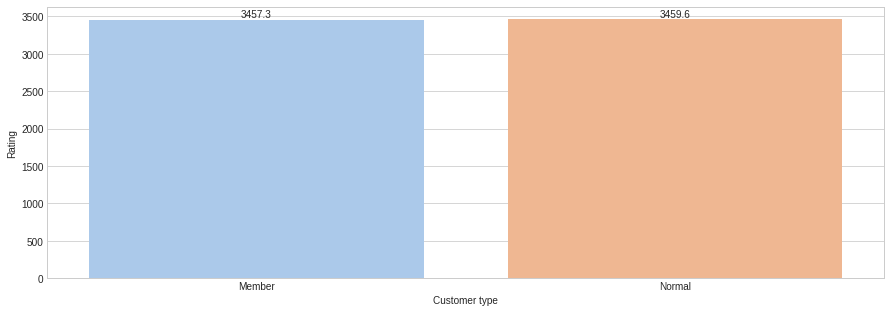

In [41]:
# Who Give us the max rating ?
plt.figure(figsize = (15, 5))
df = data['Rating'].groupby(data['Customer type']).sum().reset_index()
ax = sns.barplot(x = df['Customer type'], y = df['Rating'])
for i in ax.containers:
    ax.bar_label(i)

* Both of them are like to be equally in rating

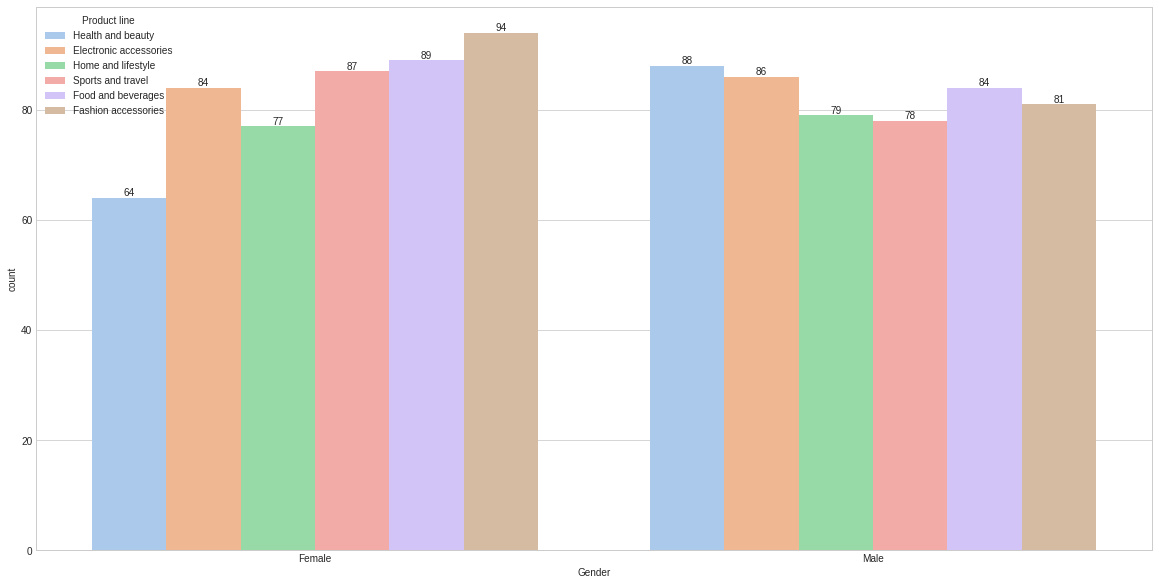

In [50]:
# Which Gender is interesting in which Product line
plt.figure(figsize = (20, 10))
ax = sns.countplot(x = data['Gender'], hue = data['Product line'])
for i in ax.containers:
    ax.bar_label(i)

* Most of Female are interesting in Fashion accessories, Food and bevarages and Sports and Travel
* Most of Male are interesing in Health and beauty, Electronic Accessories and Food and bevarage


In [51]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-08-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-08-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-08-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-08-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-08-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


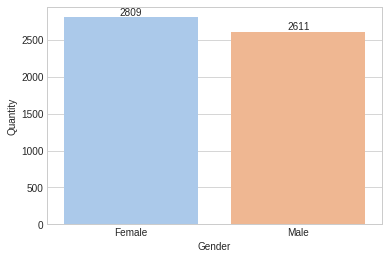

In [54]:
# Wich buy more than the other Male or Female ?
df = data['Quantity'].groupby(data['Gender']).sum().reset_index()
ax = sns.barplot(x = df['Gender'], y = df['Quantity'])
for i in ax.containers:
    ax.bar_label(i)

* Females by Quantities More than Males

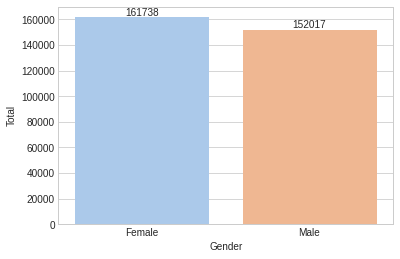

In [57]:
# Who achieve the max total ? Male or female ?
df = data['Total'].groupby(data['Gender']).sum().reset_index()
ax = sns.barplot(x = df['Gender'], y = df['Total'])
for i in ax.containers:
    ax.bar_label(i)

* Females Pay more then Males

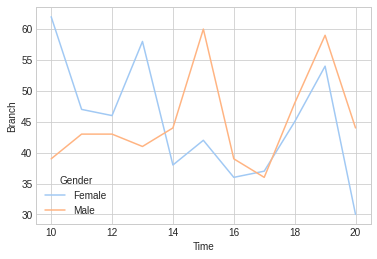

In [65]:
# Visitors Gender in hour ?
df = data.groupby(['Gender',data['Time'].dt.hour]).count()['Branch'].reset_index()
sns.lineplot(x = df['Time'], y = df['Branch'], hue = df['Gender']);

* Between 10-14 Most of our visitors is Females
* Between 14-16 Most of our Visitirs is Males

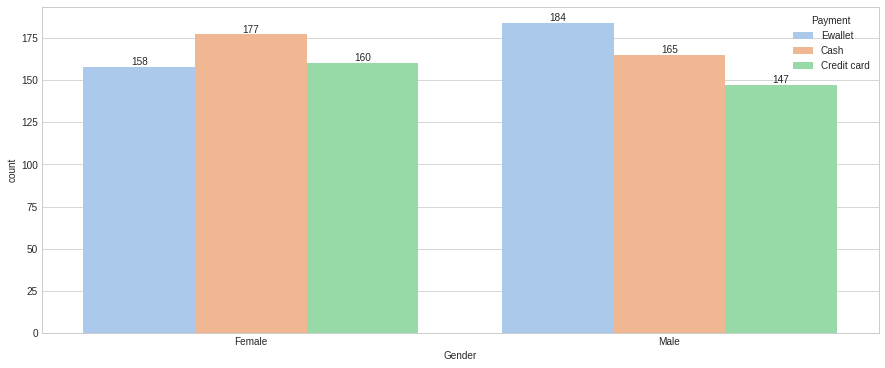

In [74]:
# What does each Gender Prefer to pay ?
plt.figure(figsize = (15, 6))
ax = sns.countplot(x = data['Gender'], hue = data['Payment'])
for i in ax.containers:
    ax.bar_label(i)

* Most of Females Prefer to pay using Cash
* Most of Males Prefer to pay using Ewallet

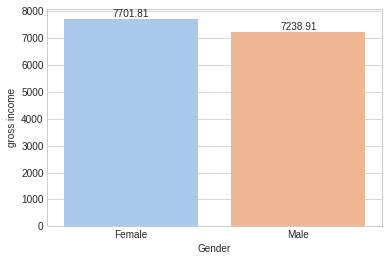

In [79]:
# From who we Get the high gross income
df = data['gross income'].groupby(data['Gender']).sum().reset_index()
ax = sns.barplot(x = df['Gender'], y = df['gross income'])
for i in ax.containers:
    ax.bar_label(i)

* We Get the high gross income from female

In [81]:
# Who give us the high rate ?
df = data['Rating'].groupby(data['Gender']).sum().reset_index()
df

,Gender,Rating
0,Female,3454.9
1,Male,3462.0


* Both of them are almost equal

In [82]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-08-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-08-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-08-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-08-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-08-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


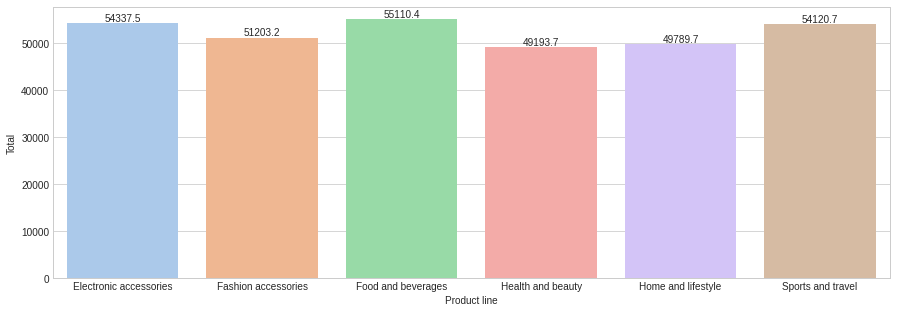

In [88]:
# Which Profuct line gain the max Total ?
plt.figure(figsize = (15, 5))
df = data['Total'].groupby(data['Product line']).sum().reset_index()
ax = sns.barplot(x = df['Product line'], y = df['Total'])
for i in ax.containers:
    ax.bar_label(i)

* Food and bevearages, Electronic accessories and Sports and travel Gain the max Total

<AxesSubplot:xlabel='Date', ylabel='Product line'>

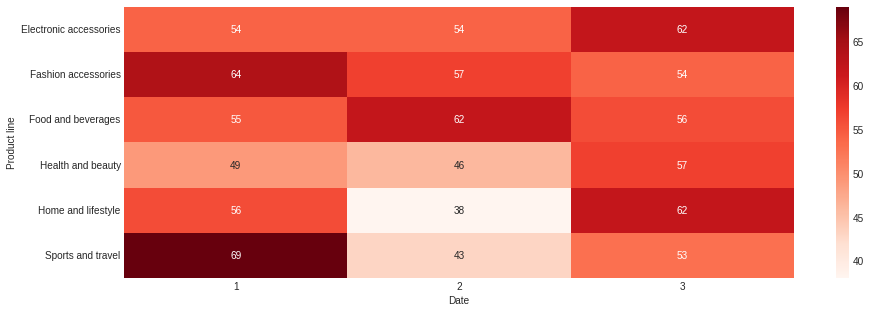

In [98]:
# Which Product line is Beset selling in each month ?
plt.figure(figsize = (15, 5))
df = data['Branch'].groupby([data['Date'].dt.month, data['Product line']]).count().reset_index()
df = df.pivot_table(index = 'Product line', columns = 'Date', values = 'Branch') 
sns.heatmap(df, cmap = "Reds", fmt = "d", annot = True)

* January has the best selling for Sports and travel, Fashion accessories
* February has the best selling Food and beverages
* March has the best selling Home and lifestyle, Electronic accessories

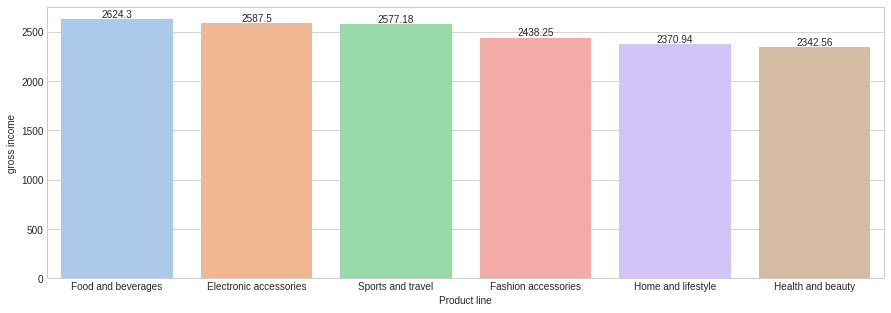

In [121]:
# Which Product line give us the best groos income ?
plt.figure(figsize = (15, 5))
df = data.groupby('Product line').sum()['gross income'].reset_index().sort_values(by = 'gross income', ascending = False)
ax = sns.barplot(x = df['Product line'], y = df['gross income'])
for i in ax.containers:
    ax.bar_label(i)

* The best three Lines for gross income Food and beverages, Electronic Accessories, Sports and travel
* The Lowest Line for gross incomde Health and beauty

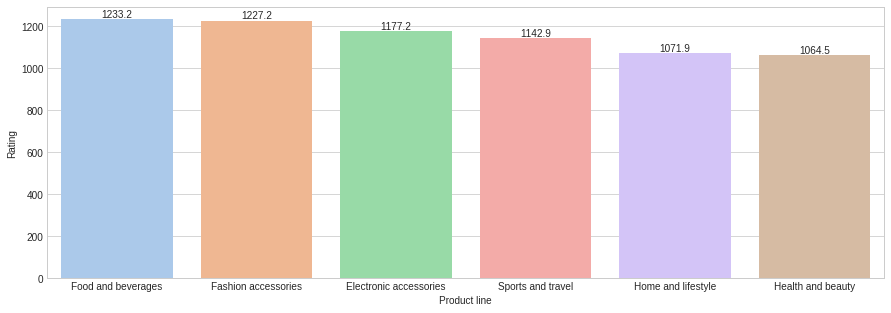

In [109]:
# Which Product line have the best Rating ??
plt.figure(figsize = (15, 5))
df = data['Rating'].groupby(data['Product line']).sum().reset_index().sort_values(by = 'Rating', ascending = False)
ax = sns.barplot(x = df['Product line'], y = df['Rating'])
for i in ax.containers:
    ax.bar_label(i)

* The best rating come from Food, Fashion
* The worest rating comde from Health and beauty

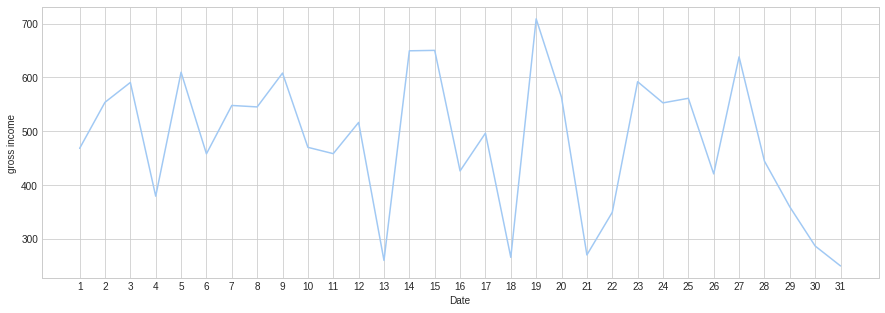

In [122]:
# in which month we acheive the max gross income
plt.figure(figsize = (15, 5))
df = data['gross income'].groupby(data['Date'].dt.day).sum().reset_index()
sns.lineplot(x = df['Date'], y = df['gross income']);
plt.xticks(range(1, 32));

* day 19 we hit the max gross income 
* day 29, 30, 31 we hit the min gross income